In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics

%matplotlib inline
plt.style.use('ggplot')
# sns.set(style="white")
mpl.rcParams['figure.figsize'] = [10, 6]

In [2]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.int)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)


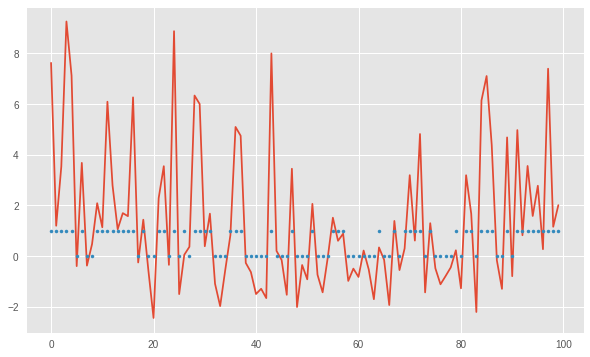

In [3]:
plt.plot(X)
plt.plot(y, '.')

In [4]:
X = X[:, np.newaxis] 

X.shape, y.shape

((100, 1), (100,))

In [5]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y) 

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

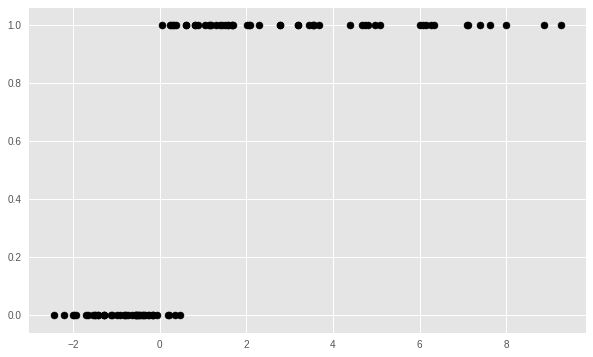

In [6]:
# and plot the result
plt.figure()
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20) 

(300,) (1, 1) (1,) (1, 300)


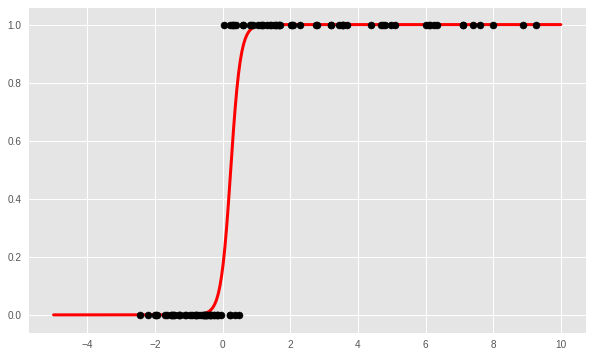

In [7]:
# and plot the result
plt.figure()
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)


X_test = np.linspace(-5, 10, 300)

def model(x):
    return 1 / (1 + np.exp(-x))

print(X_test.shape, clf.coef_.shape, clf.intercept_.shape, (X_test * clf.coef_ + clf.intercept_).shape) 

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

## Do it again, but with 3 input vectors

In [8]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
n_vectors = 3
np.random.seed(0)
X = np.random.normal(size=(n_samples, n_vectors))
y = (X.mean(axis=1) > 0).astype(int)
X[X > 0] *= 4
X += .3 * np.random.normal(size=(n_samples, n_vectors))


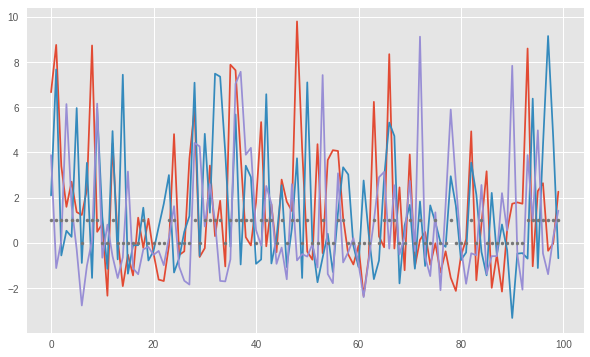

In [9]:
plt.plot(X)
plt.plot(y, '.') 

In [10]:
print(X.shape, y.shape)

(100, 3) (100,)


In [11]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y) 

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

(300, 3)


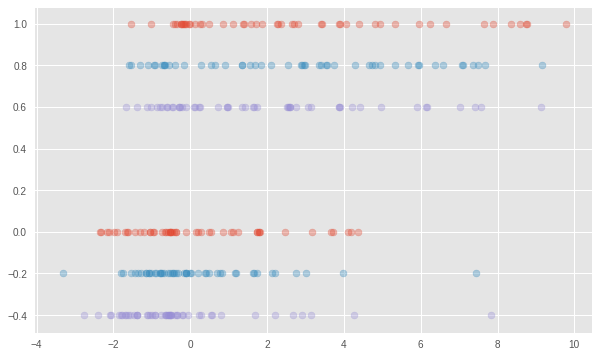

In [24]:
# and plot the result
plt.figure()
plt.clf()
for i in range(n_vectors):
    plt.scatter(X[:, i], y - i/5, zorder=20, alpha=0.35) 
    
    
X_test = np.linspace(-7, 10, 300)[:, np.newaxis] * np.ones((1, 3))

print(X_test.shape)

In [25]:
def getXYcut(loss, X_test, beta):
    """Use linear interpolation to get the relevant values for X, and then compute Y.
    The XY-values are switched on purpose in the call to the interp function, relative to it's documentation.
    The given y (beta) is also computed... it's not needed, in the sense that it's alreaddy determined by the
    input to the function, but it's useful to test the precision of the interpolation."""
    X_cut = np.interp(beta, loss, X_test[:, 0])
    y_cut = model(X_cut*np.ones((1, 3)), clf.coef_, clf.intercept_)
    return np.array([X_cut, y_cut]) 

(300, 3)


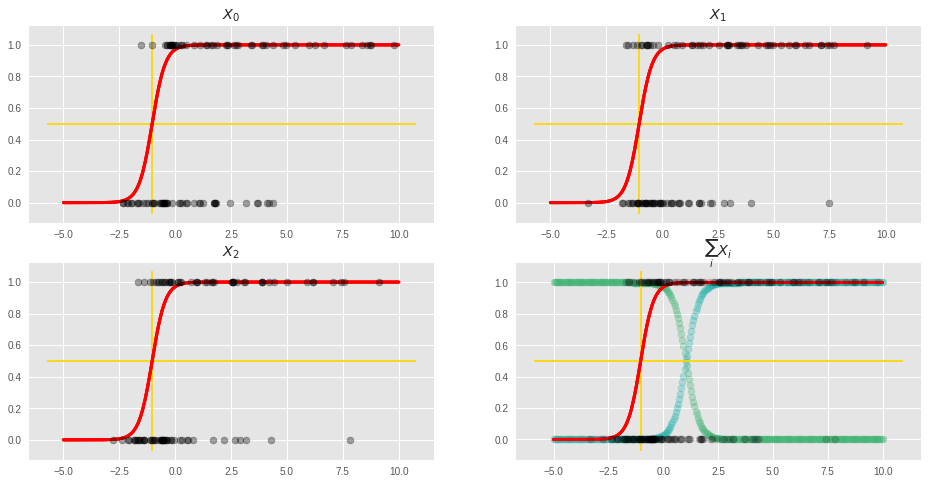

In [31]:
# and plot the result
prob0 = clf.predict_proba(X_test)[:, 0]
prob1 = clf.predict_proba(X_test)[:, 1]

X_test = (np.linspace(-5, 10, 300)[:, np.newaxis] * np.ones((1, 3)))
print(X_test.shape)

def model(x, p, alpha):
    assert p.shape[1] == x.shape[1], "Dimmension mismatch"
    # it's a dot product in the exponent, thus reducing the
    # dimmensions to a vector
    return 1 / (1 + np.exp(-x @ p.T + alpha))  

loss = model(X_test, clf.coef_, clf.intercept_).ravel()

fig, axi = plt.subplots(2, 2, figsize=(16, 8))
axi = axi.flatten() 
beta = 0.5
X_cut, y_cut = getXYcut(loss, X_test, beta)
for i in range(n_vectors):
    axi[i].scatter(X[:, i], y, zorder=20, alpha=0.35, color='k')
    axi[-1].scatter(X[:, i], y, zorder=20, alpha=0.15, color='k')
    axi[i].set_title(f"$X_{i}$")
axi[-1].set_title(r"$\sum_i X_i$")
axi[-1].scatter(X_test[:, 0], prob0, alpha=0.3, color='mediumseagreen')
axi[-1].scatter(X_test[:, 1], prob1, alpha=0.3, color='lightseagreen')
for i in range(n_vectors + 1):
    axi[i].plot(X_test, loss, color='red', linewidth=3, alpha=1)
    axi[i].vlines(X_cut, *axi[i].get_ybound(), color='gold')
    axi[i].hlines(y_cut, *axi[i].get_xbound(), color='gold')


# Play with ROC curves

In [32]:
fpr, tpr, thr = metrics.roc_curve(y, clf.predict_proba(X)[:, 1]) 

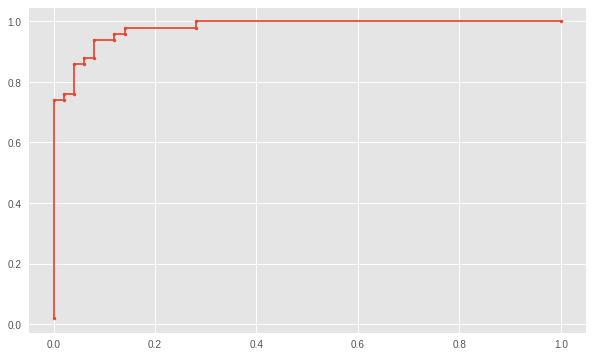

In [33]:
plt.plot(fpr, tpr, '.-')

In [36]:
metrics.roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9788

In [37]:
metrics.auc(fpr, tpr)

0.9788

In [38]:
threshold = np.linspace(0, 1, 500)
prob0, prob1 = clf.predict_proba(X).T
fpr_lst = list()
tpr_lst = list()
for i, t in enumerate(threshold): 
    fpr, tpr, thr = metrics.roc_curve(y.astype(bool), prob1 > t)
    fpr_lst.append(fpr)
    tpr_lst.append(tpr)

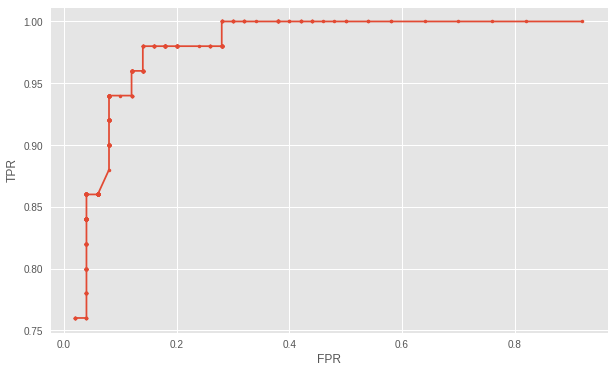

In [39]:
fig, ax = plt.subplots()
ax.plot([el[1] for el in fpr_lst if len(el) == 3], [el[1] for el in tpr_lst if len(el) == 3], '.-')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

/lscr_paper/allan/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


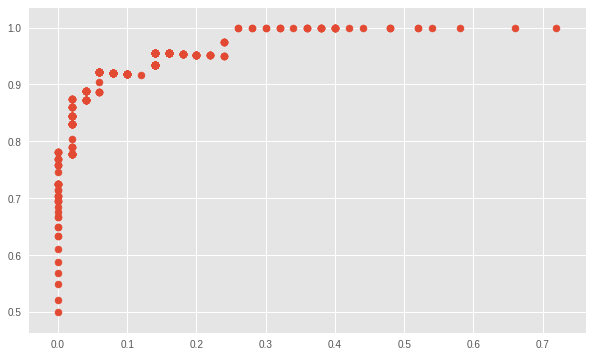

In [40]:
threshold = np.linspace(0, 1, 500)
prob0, prob1 = clf.predict_proba(X).T
fpr = np.NaN*np.zeros_like(threshold)
tpr = np.NaN*np.zeros_like(threshold)
for i, t in enumerate(threshold):
    cm = metrics.confusion_matrix(y, prob1 >= t)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[1, 0]
    fn = cm[0, 1]
    tpr[i] = tp/(tp + fn)
    fpr[i] = fp/(fn + tn)

fig, ax = plt.subplots()
ax.scatter(fpr, tpr, linewidths=0.5)

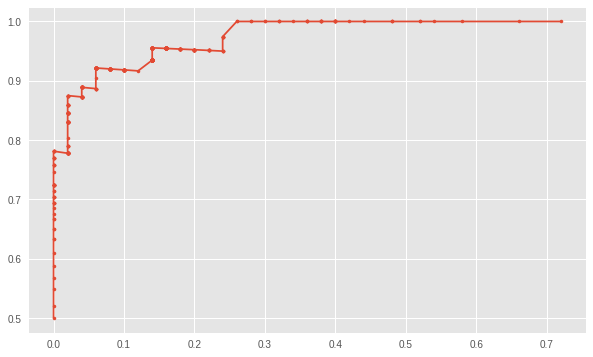

In [41]:
plt.plot(fpr, tpr, '.-')

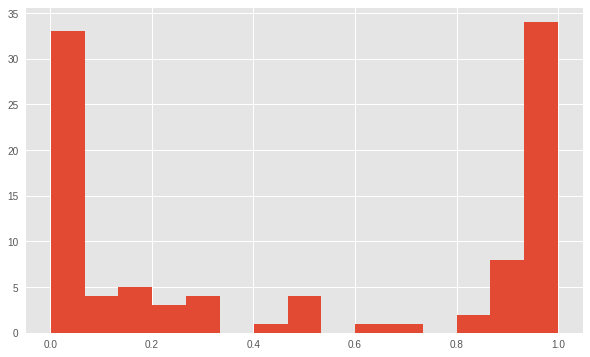

In [42]:
plt.hist(prob1, bins=15);

In [43]:
clf.score(X, y)

0.91000000000000003

In [44]:
((prob1 > 0.5) == y).mean() 

0.91000000000000003

In [45]:
cm = metrics.confusion_matrix(y, prob1 >= 0.5)
cm

array([[46,  4],
       [ 5, 45]])

In [46]:
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1] 

In [47]:
tpr = tp/(tp + fp)
tpr

0.90000000000000002

In [48]:
np.allclose(metrics.recall_score(y, prob1 > 0.5), tpr)

True

In [49]:
fpr = fp/(fp + tp)
fpr

0.10000000000000001

In [50]:
metrics.precision_score(y, prob1 > 0.5)

0.91836734693877553